In [2]:
import pandas as pd
import os, re
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [3]:
def load_images(path="image_jpg"):
    train_folder=os.path.join(os.getcwd(),'image_jpg',"train")
    test_folder=os.path.join(os.getcwd(),'image_jpg',"test")
    
    X_train, X_test, Y_train, Y_test = [],[],[],[]
    
    # loading images from train folder to X_train and label to y_train
    train_count = 0
    for image_fname in os.listdir(train_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.jpg',image_fname)
        
        # process preprocessed image into normalised flattened numpy array
        image = cv2.imread(os.path.join(train_folder,image_fname))
        grey = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        label = image_re.group(2)
        
        # X_train.append(flat)
        X_train.append(grey)
        Y_train.append(label)
        train_count+=1
        if train_count % 1000==0:
            print(train_count)
    print("Loaded train folder")
    
    # loading images from test folder to X_test and label to y_test
    test_count=0
    for image_fname in os.listdir(test_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.jpg',image_fname)
        
        # process preprocessed image into normalised flattened numpy array
        image = cv2.imread(os.path.join(test_folder,image_fname))
        grey = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        label = image_re.group(2)
        
        # X_test.append(flat)
        X_test.append(grey)
        Y_test.append(label)
        test_count+=1
        if test_count % 1000==0:
            print(test_count)
    print("Loaded test folder")
    return X_train, X_test, Y_train, Y_test

In [4]:
X_train, X_test, Y_train, Y_test = load_images()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Loaded train folder
1000
Loaded test folder


In [5]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10618, 240, 240)
(1405, 240, 240)
(10618,)
(1405,)


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /=255

In [7]:
from keras.utils import to_categorical

print("Shape before one-hot encoding : ",y_train.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("Shape after one-hot encoding : ",y_test.shape)


2024-06-22 04:26:26.548318: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-22 04:26:27.723974: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 04:26:27.724110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 04:26:27.878030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-22 04:26:28.239058: I tensorflow/core/platform/cpu_feature_guar

Shape before one-hot encoding :  (10618,)
Shape after one-hot encoding :  (1405, 4)


In [7]:
x_train

array([[[0.24705882, 0.27450982, 0.27450982, ..., 0.28235295,
         0.28235295, 0.27058825],
        [0.25882354, 0.23529412, 0.2627451 , ..., 0.3019608 ,
         0.29411766, 0.27058825],
        [0.25490198, 0.26666668, 0.25490198, ..., 0.2627451 ,
         0.2784314 , 0.27058825],
        ...,
        [0.25490198, 0.24705882, 0.25882354, ..., 0.38431373,
         0.5058824 , 0.5176471 ],
        [0.2784314 , 0.28235295, 0.30980393, ..., 0.42745098,
         0.50980395, 0.46666667],
        [0.27450982, 0.27058825, 0.30588236, ..., 0.47843137,
         0.4745098 , 0.49411765]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [21]:
y_train

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [8]:
image_size = 240

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model with dropout layers
def create_model_with_dropout(input_shape=(240, 240, 1), num_classes=4):
    model = models.Sequential()
    
    # Convolutional layers
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=input_shape, padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer
    model.add(layers.Dense(4, activation='sigmoid'))
    # 6/17/2024 try softmax
    #model.add(layers.Dense(4, activation='softmax'))
    
    return model

# Create an instance of the model
model = create_model_with_dropout()

# Print model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 240, 240, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 120, 120, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,881,668 (7.18 MB)

 Trainable params: 1,881,668 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs = 12, batch_size=32, validation_data = (x_test, y_test))
loss, accuracy = model.evaluate(x_test,y_test)
print(f'Test Accuracy {accuracy*100:.2f}%')

Epoch 1/12
 38/332 ━━━━━━━━━━━━━━━━━━━━ 1:27 297ms/step - accuracy: 0.2799 - loss: 1.3584

KeyboardInterrupt: 

In [1]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow
import keras_tuner

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerastuner import HyperModel

def build_model(hp):
    model = models.Sequential()
    
    # Convolutional layers
    # max_value set to 32 cause if the first two layer too big the model accuracy will be very low
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=32, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(240, 240, 1),
        padding='same'
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    # same as layer 1
    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=32, step=32),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=32),
        kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(
        filters=hp.Int('conv_4_filter', min_value=64, max_value=128, step=64),
        kernel_size=hp.Choice('conv_4_kernel', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=128, step=64),
        activation='relu'
    ))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(layers.Dense(4, activation = hp.Choice('output_activation', values=['softmax', 'sigmoid'])))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 240, 240, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 120, 120, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,881,668 (7.18 MB)

 Trainable params: 1,881,668 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Define the tuner
tuner_random_3 = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='random_search_dir_3',
    project_name='cnn_hyperparameter'
)

In [43]:
tuner_random_3.search_space_summary()

Search space summary
Default search space size: 12
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 32, 'step': 32, 'sampling': 'linear'}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 32, 'step': 32, 'sampling': 'linear'}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_3_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
conv_3_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_4_filter (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 64, 'sampling': 'linear'}
conv_4_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128,

In [ ]:
tuner_random_3.search(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test))

Trial 10 Complete [00h 19m 39s]
val_accuracy: 0.8882562518119812

Best val_accuracy So Far: 0.9081850647926331
Total elapsed time: 05h 02m 54s


In [45]:
# Retrieve the best model
best_model = tuner_random_3.get_best_models(num_models=1)[0]

# Train the best model
history = best_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 115s 342ms/step - accuracy: 0.9449 - loss: 0.1503 - val_accuracy: 0.9203 - val_loss: 0.2797
Epoch 2/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 113s 342ms/step - accuracy: 0.9609 - loss: 0.1080 - val_accuracy: 0.9082 - val_loss: 0.3588
Epoch 3/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 113s 341ms/step - accuracy: 0.9627 - loss: 0.0999 - val_accuracy: 0.9260 - val_loss: 0.3627
Epoch 4/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 113s 340ms/step - accuracy: 0.9632 - loss: 0.0984 - val_accuracy: 0.9217 - val_loss: 0.3491
Epoch 5/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 114s 342ms/step - accuracy: 0.9642 - loss: 0.0914 - val_accuracy: 0.9338 - val_loss: 0.3454
Epoch 6/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 113s 340ms/step - accuracy: 0.9747 - loss: 0.0667 - val_accuracy: 0.9274 - val_loss: 0.3605
Epoch 7/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 114s 342ms/step - accuracy: 0.9707 - loss: 0.0784 - val_accuracy: 0.9246 - val_loss: 0.4364
Epoch 8/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 114s 344ms/step - accuracy: 0.9722 -

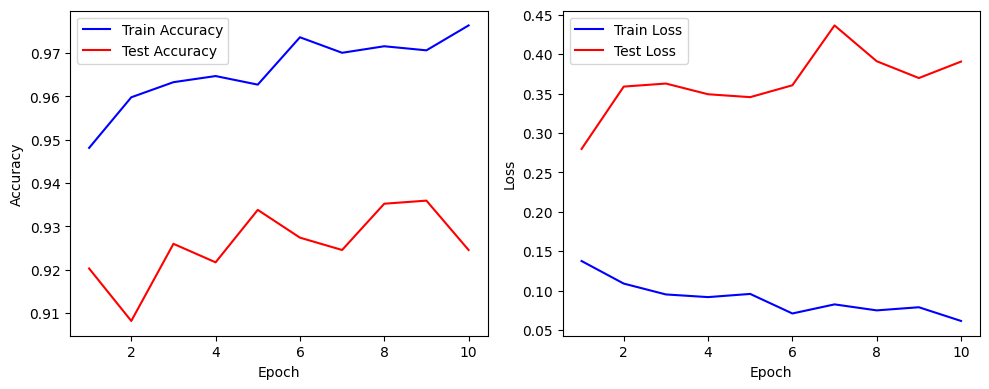

In [47]:
import matplotlib.pyplot as plt
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [49]:
loss, accuracy = best_model.evaluate(x_test,y_test)
print(f'Test Accuracy {accuracy*100:.2f}%')

44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9192 - loss: 0.4124
Test Accuracy 92.46%


In [53]:
import numpy as np
from sklearn.metrics import classification_report

predict_x = best_model.predict(x_test)
predict1 = np.argmax(predict_x, axis = 1)
print(predict1)

target_names = ["Class {}".format(i) for i in range(4)]
print(classification_report(np.array([int(class_) for class_ in Y_test]), predict1, target_names = target_names))

44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step
[3 2 1 ... 1 3 3]
              precision    recall  f1-score   support

     Class 0       0.93      0.87      0.90       309
     Class 1       0.65      0.92      0.76       335
     Class 2       0.97      0.73      0.84       399
     Class 3       0.97      0.90      0.93       362

    accuracy                           0.85      1405
   macro avg       0.88      0.86      0.86      1405
weighted avg       0.89      0.85      0.86      1405

